# variable Description

**independent variable**

1. **carat weight of the diamond** (0.2--5.01)

2. **cut** quality of the cut (Fair, Good, Very Good, Premium, Ideal)

3. **color** diamond colour, from J (worst) to D (best)

4. **clarity** a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

5. **x** length in mm (0--10.74)

6. **y** width in mm (0--58.9)

7. **z** depth in mm (0--31.8)

8. **depth** total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)

9. **table** width of top of diamond relative to widest point (43--95)

**dependent variable**

10. **price** price in US dollars (\$326--\$18,823)

# Imports

In [1]:
# Pandas and numpy for data manipulation
import pandas as pd
import numpy as np

# No warnings about setting value on copy of slice
pd.options.mode.chained_assignment = None

# For ignoring and non-display of warnings
import warnings 
warnings.filterwarnings('ignore')

# For estimations of different statistical models
import statsmodels.api as sm

# Display up to 60 columns of a dataframe
pd.set_option('display.max_columns', 60)

# Matplotlib visualization
import matplotlib.pyplot as plt
%matplotlib inline

# Set default font size
plt.rcParams['font.size'] = 24

# Internal ipython tool for setting figure size
from IPython.core.pylabtools import figsize

# Seaborn for visualization
import seaborn as sns
sns.set(font_scale = 1.25)

# Splitting data into training and testing
from sklearn.model_selection import train_test_split

# For changing categorical to numerical
from sklearn.preprocessing import LabelEncoder

# For performing statistical operations
import scipy.stats as stats

# For check for multi col-linearity among features
from statsmodels.stats.outliers_influence import variance_inflation_factor

# For standardizing features by remvoing the mean and scaling to unit variance
from sklearn.preprocessing import StandardScaler

# For bringing class balance in the dependent variable by over-sampling
from imblearn.over_sampling import SMOTE

# Machine Learning Models
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# For checking accuracy score of the models
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score,confusion_matrix,roc_curve,classification_report

# Data Cleaning and Formatting
## Load in the Data and Examine

In [2]:
# Read in data into a dataframe 
dff=pd.read_csv("diamonds.csv")
# Display top of dataframe
dff.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [3]:
dff.shape

(53940, 11)

# Data Types 

In [4]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
Unnamed: 0    53940 non-null int64
carat         53940 non-null float64
cut           53940 non-null object
color         53940 non-null object
clarity       53940 non-null object
depth         53940 non-null float64
table         53940 non-null float64
price         53940 non-null int64
x             53940 non-null float64
y             53940 non-null float64
z             53940 non-null float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


# Convert Data to Correct Types and Feature Engineering

In [5]:
dff.drop('Unnamed: 0',axis=1,inplace=True)

In [6]:
dff.head(5)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [7]:
dff.rename(columns={'x':'length_mm','y':'width_mm','z':'depth_mm','depth':'total_depth_percentage'},inplace=True)

In [8]:
dff.head(5)

,carat,cut,color,clarity,total_depth_percentage,table,price,length_mm,width_mm,depth_mm
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [9]:
data=dff['price']

In [10]:
dff.drop('price',axis=1,inplace=True)

In [11]:
df=pd.concat([dff,data],axis=1)

In [12]:
df.head()

,carat,cut,color,clarity,total_depth_percentage,table,length_mm,width_mm,depth_mm,price
0,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43,326
1,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31,326
2,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31,327
3,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63,334
4,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75,335


#  dealing with missing values

**Now, let's take a look at the variables regarding the dimension of the diamonds: length_mm, width_mm, and depth_mm.**

* The first thing we notice is that the minimum values for these features are zero. 
* we know this can't be possible.

In [13]:
#Let's examine the values of length_mm that are equal to zero:
df.loc[df['length_mm']==0]


,carat,cut,color,clarity,total_depth_percentage,table,length_mm,width_mm,depth_mm,price
11182,1.07,Ideal,F,SI2,61.6,56.0,0.0,6.62,0.0,4954
11963,1.00,Very Good,H,VS2,63.3,53.0,0.0,0.00,0.0,5139
15951,1.14,Fair,G,VS1,57.5,67.0,0.0,0.00,0.0,6381
24520,1.56,Ideal,G,VS2,62.2,54.0,0.0,0.00,0.0,12800
26243,1.20,Premium,D,VVS1,62.1,59.0,0.0,0.00,0.0,15686
27429,2.25,Premium,H,SI2,62.8,59.0,0.0,0.00,0.0,18034
49556,0.71,Good,F,SI2,64.1,60.0,0.0,0.00,0.0,2130
49557,0.71,Good,F,SI2,64.1,60.0,0.0,0.00,0.0,2130


* Interesting... some of the diamonds with the value of zero in x also have zeros in the other dimensions.
  Although the actual value is zero, it makes more sense to consider these as missing values since, in this context, zero
  is not an admissible value.
* We will do the following: excluding the first row (we will get back to that one in a second), we will remove the
  remaining seven data points.Of course, we are losing some information, but remember we have 53,940 data points 
  so losing seven is actually not a big deal, so let's keep the rows 

In [14]:
df = df.loc[(df['length_mm']>0) | (df['width_mm']>0)]

Now, let's examine the only row left where we have length_mm with a value of zero; since we know that the index for that
row is 11182, let's use it to get the pandas series of the corresponding data point

In [15]:
df.iloc[11182]


carat                      1.07
cut                       Ideal
color                         F
clarity                     SI2
total_depth_percentage     61.6
table                        56
length_mm                     0
width_mm                   6.62
depth_mm                      0
price                      4954
Name: 11182, dtype: object

Now, let's use another simple method of imputation for the missing value in length_mm. Since this seems like a diamond      that is not very far from the average price (or average carat),let's replace the remaining missing value with the median of lenth_mm and depth_mm

In [16]:
df.loc[11182, 'length_mm'] = df['length_mm'].median()

In [17]:
df.loc[11182, 'depth_mm'] = df['depth_mm'].median()

In [18]:
df.loc[11182]

carat                      1.07
cut                       Ideal
color                         F
clarity                     SI2
total_depth_percentage     61.6
table                        56
length_mm                   5.7
width_mm                   6.62
depth_mm                   3.53
price                      4954
Name: 11182, dtype: object

In [19]:
df.isnull().sum()

carat                     0
cut                       0
color                     0
clarity                   0
total_depth_percentage    0
table                     0
length_mm                 0
width_mm                  0
depth_mm                  0
price                     0
dtype: int64

# Exploratory Data Analysis

Exploratory Data Analysis (EDA) is an open-ended process where we make plots and calculate statistics in order to explore 
our data.The purpose is to to find anomalies, patterns, trends, or relationships. These may be interesting by themselves 
(for example finding a correlation between two variables) or they can be used to inform modeling decisions such as which 
features to use. In short, the goal of EDA is to determine what our data can tell us! EDA generally starts out with a 
high-level overview, and then narrows in to specific parts of the dataset once as we find interesting areas to examine.

# Univariate Analysis

*  **Continuous variables**

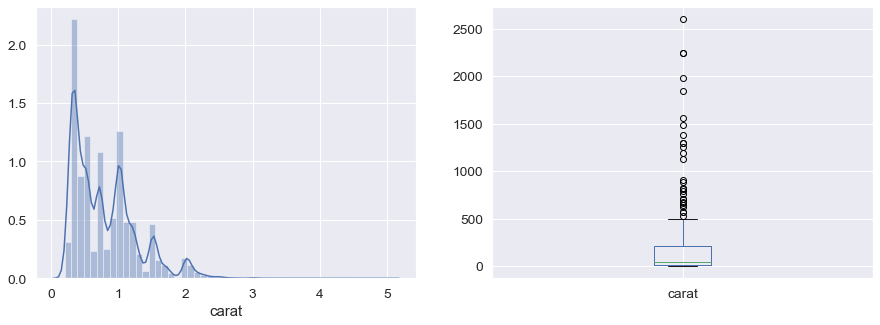

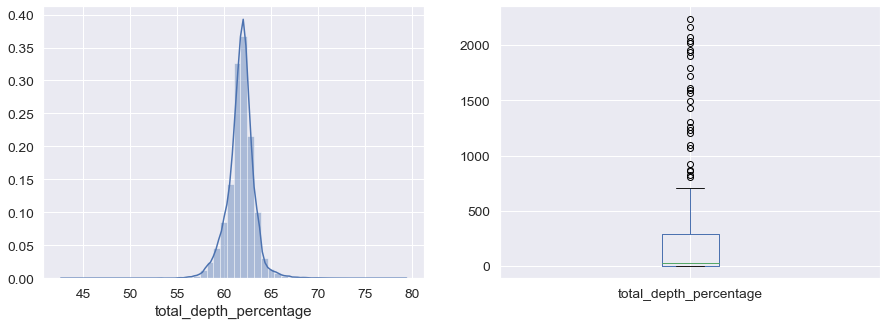

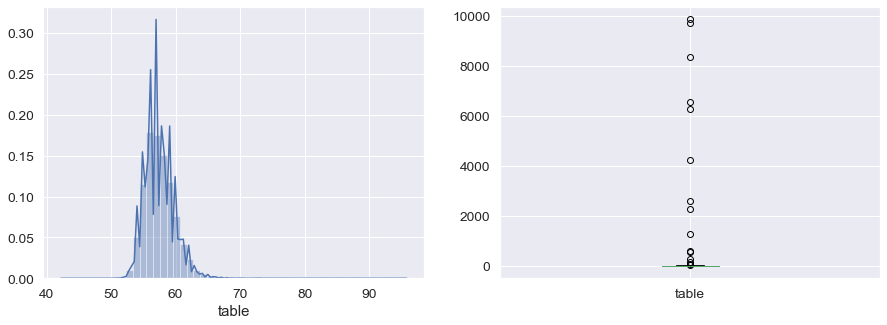

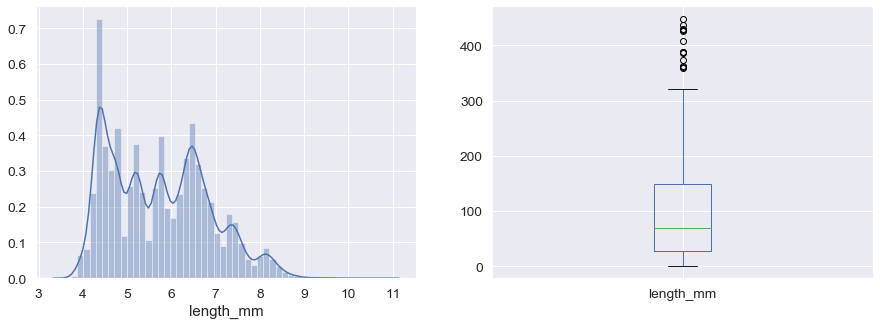

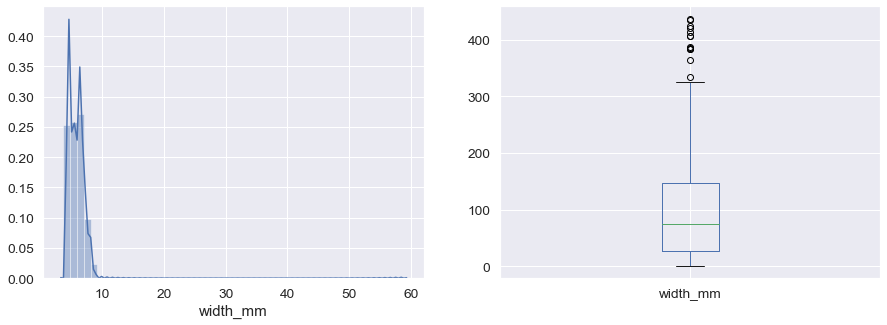

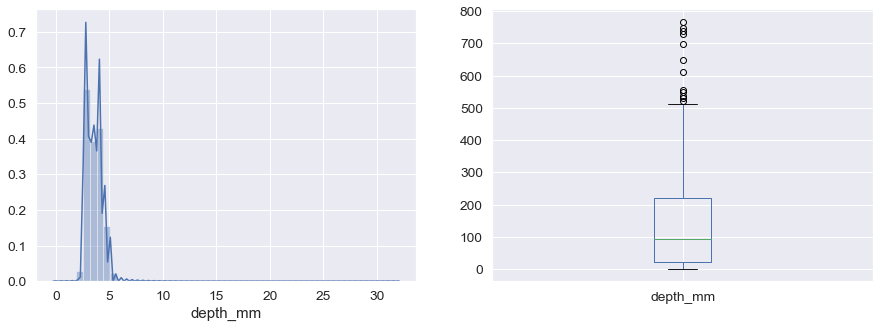

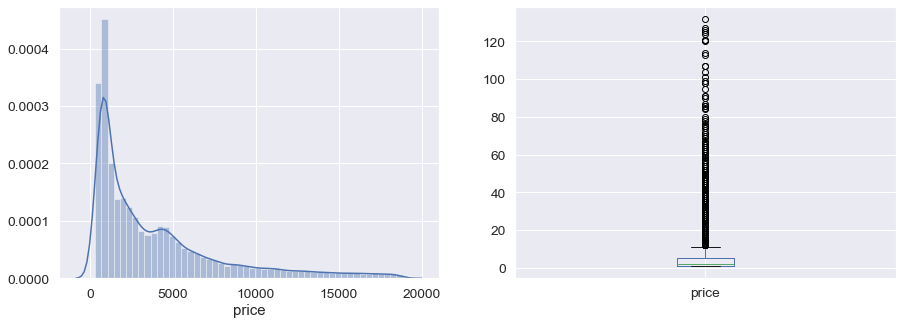

In [20]:
cols=df.select_dtypes(exclude='object')
for col in cols:
    
    f, axes = plt.subplots(1, 2, figsize=(15,5))
    axes = axes.flatten()
    sns.distplot(df[col],ax=axes[0])
    axes[0].set_xlabel(col)
    df[col].value_counts().plot.box(axes[1])
    plt.show()

* **categorical variables**

***** cut *****
           Count     Ratio
Ideal      21550  0.399570
Premium    13789  0.255669
Very Good  12081  0.224000
Good        4904  0.090928
Fair        1609  0.029833


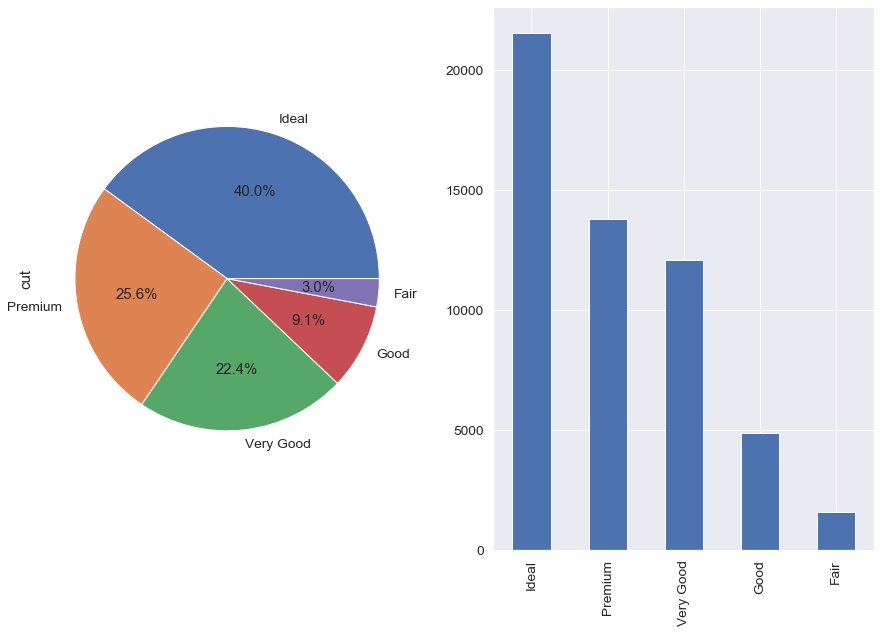

***** color *****
   Count     Ratio
G  11290  0.209334
E   9797  0.181651
F   9540  0.176886
H   8302  0.153932
D   6774  0.125600
I   5422  0.100532
J   2808  0.052065


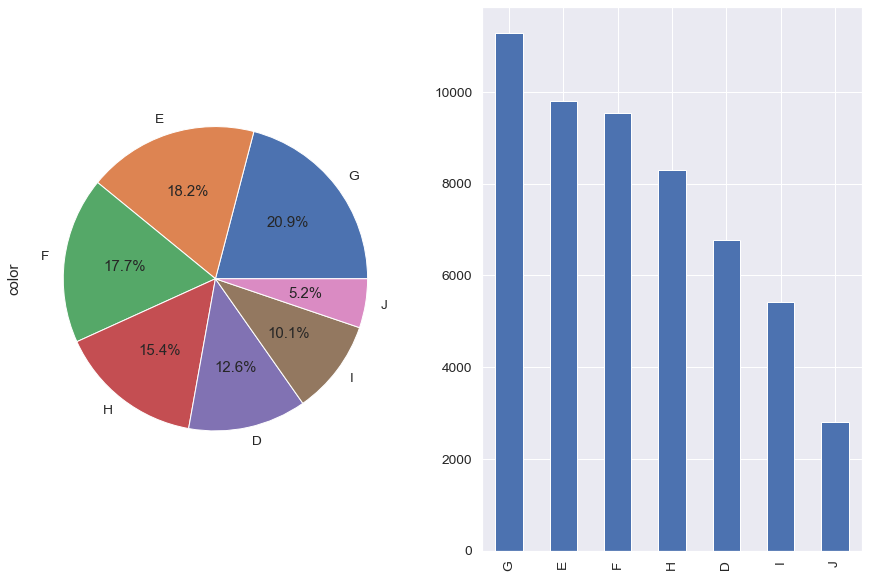

***** clarity *****
      Count     Ratio
SI1   13065  0.242245
VS2   12256  0.227245
SI2    9191  0.170415
VS1    8170  0.151484
VVS2   5066  0.093931
VVS1   3654  0.067751
IF     1790  0.033189
I1      741  0.013739


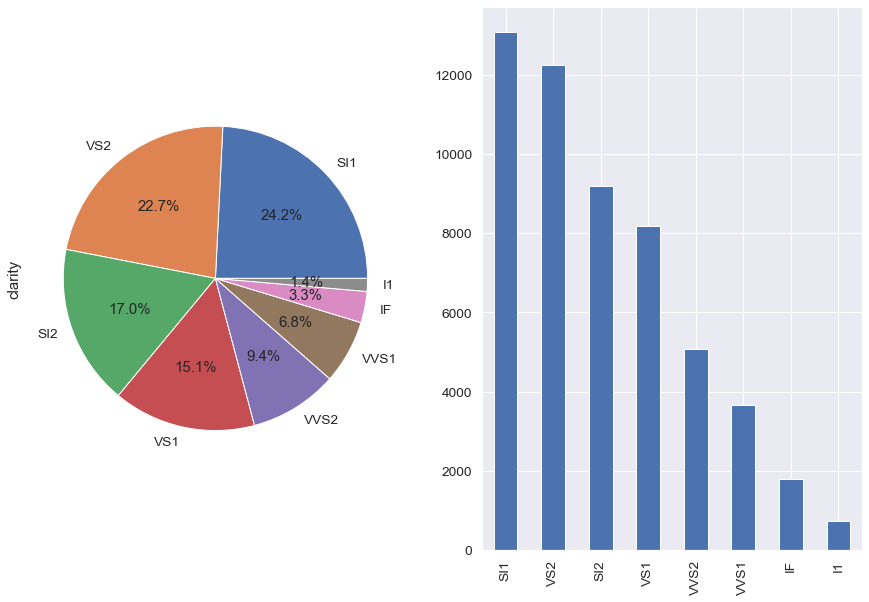

In [21]:
cat_col=df.select_dtypes(include='object')

for col in cat_col:
    print('*****', col ,'*****')
    x=pd.DataFrame({'Count':df[col].value_counts(),'Ratio':df[col].value_counts(normalize=True)})
    print(x)
    f, axes = plt.subplots(1, 2,figsize=(15,10))
    axes = axes.flatten()
    df[col].value_counts().plot.pie(autopct='%1.1f%%',ax=axes[0])

    df[col].value_counts().plot.bar(ax=axes[1])
    plt.show()

# bivariate analysis

**continous v/s continous**

**carat v/s price**

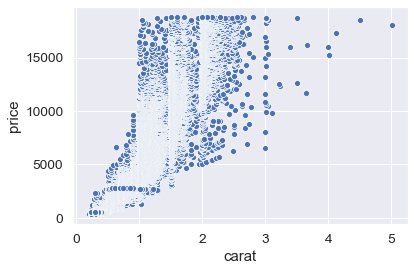

In [22]:
sns.scatterplot(df['carat'],df['price'])

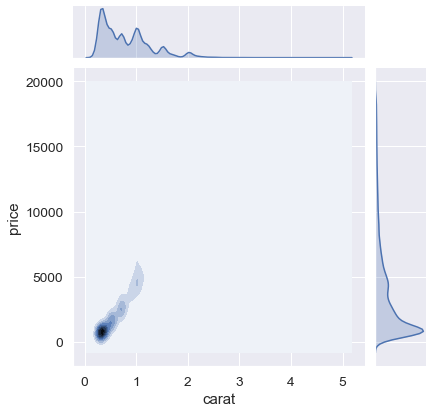

In [23]:
sns.jointplot(df['carat'],df['price'],kind='kde')

**infrerence:**
* price increases with increase in number of carats.

**total_depth_percentage v/s price**

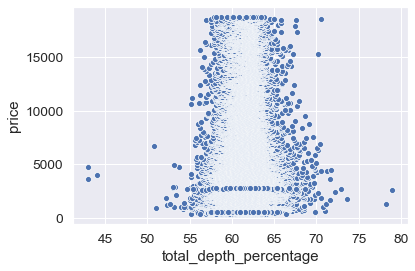

In [24]:
sns.scatterplot(df['total_depth_percentage'],df['price'])

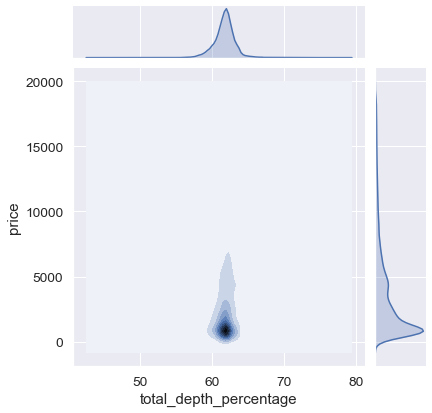

In [25]:
sns.jointplot(df['total_depth_percentage'],df['price'],kind='kde')

**inference:**
1. total depth percentage of majority of diamonds are between **55** to **70**.
2. total depth percentage has no importance in price detection.

**table v/s price**

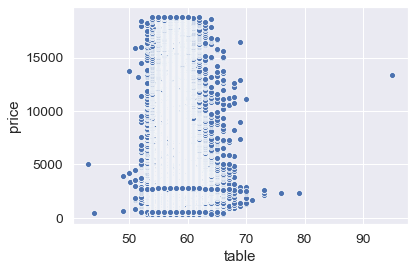

In [26]:
sns.scatterplot(df['table'],df['price'])

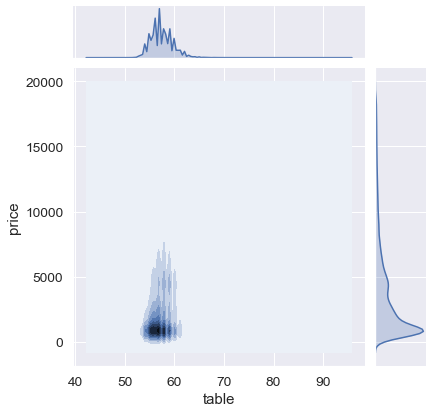

In [27]:
sns.jointplot(df['table'],df['price'],kind='kde')

**inference:**
1. table width of majority of diamonds are between **50** to **70**.
2. table width has no importance in price detection.

**length_mm v/s price**

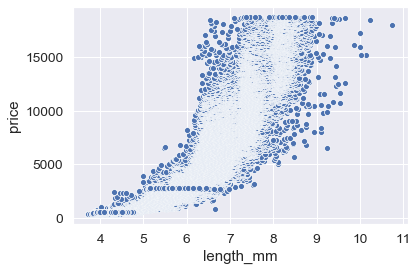

In [28]:
sns.scatterplot(df['length_mm'],df['price'])

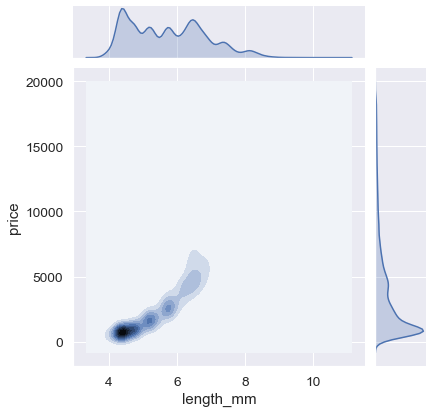

In [29]:
sns.jointplot(df['length_mm'],df['price'],kind='kde')

**inference:**
1. price of the diamond increases with increase in lenth of diamonds.

**width_mm v/s price**

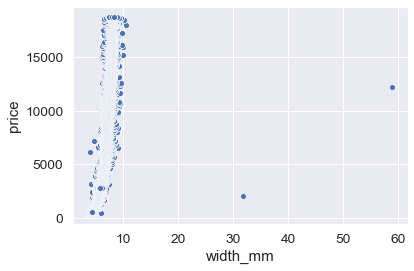

In [30]:
sns.scatterplot(df['width_mm'],df['price'])

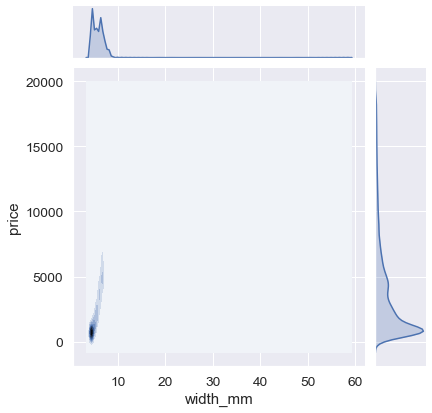

In [31]:
sns.jointplot(df['width_mm'],df['price'],kind='kde')

**inference:**
1. width of majority of diamonds are between **1** to **10**.
2. width has no importance in price detection.

**depth_mm v/s price**

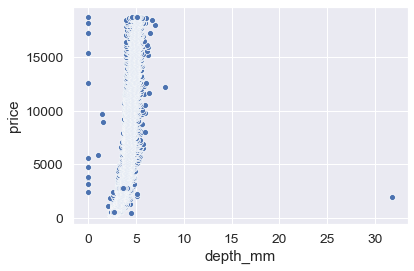

In [32]:
sns.scatterplot(df['depth_mm'],df['price'])

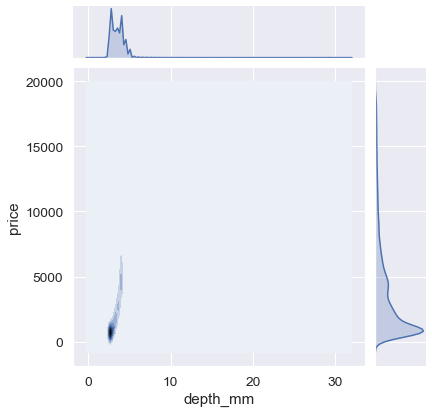

In [33]:
sns.jointplot(df['depth_mm'],df['price'],kind='kde')

**inference:**
1. depth of majority of diamonds are between **1** to **5**.
2. depth has no importance in price detection.

**categorical v/s continous**

**cut v/s price**

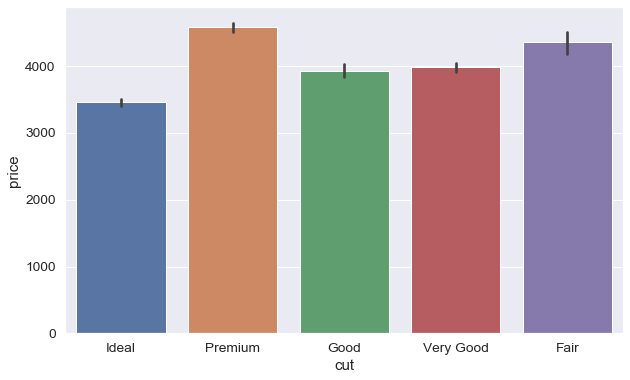

In [34]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'cut', y = 'price', data = df)

**inference:**
1. **ideal cut** of diamond has less price comapared to remaining cuts i.e approx **3500**.
2. **premium cut** of diamond has higher price compared to other cuts ie. approx **4500**
3. **good cut** and **verygood cut** have almost same price.

**color v/s price**

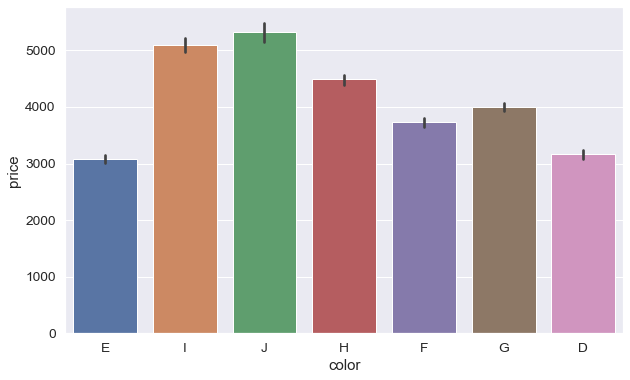

In [35]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'color', y = 'price', data = df)

**inference:**
1. **color E** diamonds have less price comapared to remaining colored diamonds i.e approx **3000**.
2. **color j** diamonds have higher price compared to other colored diamonds ie. approx **5500**


**clarity v/s price**

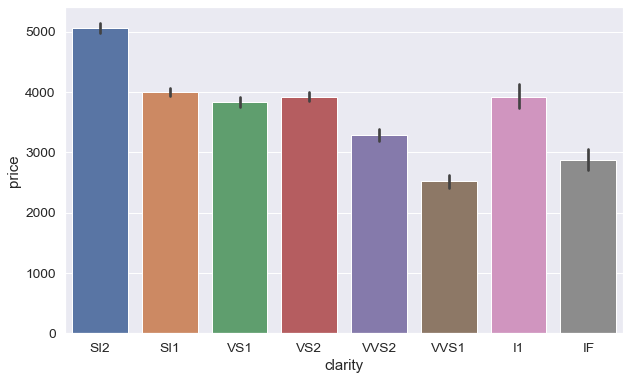

In [36]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'clarity', y = 'price', data = df)

**inference:**
1. **SI2** diamonds has high price comapared to remaining cuts i.e approx **5000**.
2. **WS1** diamonds has less price compared to other cuts ie. approx **2500**


### Converting Categorical data to Numerical Data using pandas get_dummies

In [37]:
data=pd.get_dummies(df,drop_first=False)
data.head()

,carat,total_depth_percentage,table,length_mm,width_mm,depth_mm,price,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_D,color_E,color_F,color_G,color_H,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,3.95,3.98,2.43,326,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,3.89,3.84,2.31,326,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,4.05,4.07,2.31,327,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
3,0.29,62.4,58.0,4.20,4.23,2.63,334,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
4,0.31,63.3,58.0,4.34,4.35,2.75,335,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0


In [38]:
data.shape

(53933, 27)

In [39]:
x=data['price']
data.drop('price',axis=1,inplace=True)
df=pd.concat([data,x],axis=1)


# Assumptions for linear regression

In [40]:
from statsmodels.tools import add_constant as add_constant
import statsmodels.api as sm
X= df.drop(['price'], axis=1)
Xc = sm.add_constant(X)
y=df['price']

In [41]:

model=sm.OLS(y,Xc)
result=model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                 2.700e+04
Date:                Sat, 04 Jan 2020   Prob (F-statistic):               0.00
Time:                        10:26:30   Log-Likelihood:            -4.5554e+05
No. Observations:               53933   AIC:                         9.111e+05
Df Residuals:                   53909   BIC:                         9.114e+05
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                   4410.2174    271.601     16.238      0.000    3877.877    4942.558
carat                   1.152e+04     51.582    223.291      0.000    1.14e+04    1.16e+04
total_depth_percentage   -68.3730      4.535    -15.076      0.000     -77.262     -59.484
table                    -26.4827      2.906     -9.115      0.000     -32.178     -20.788
length_mm              -1129.1364     33.803    -33.404      0.000   -1195.390   -1062.882
width_mm                  21.2505     19.404      1.095      0.273     -16.782      59.283
depth_mm                 -56.2449     33.417     -1.683      0.092    -121.742       9.252
cut_Fair                 308.7247     66.448      4.646      0.000     178.485     438.964
cut_Good                 881.8028     57.800     15.256      0.000     768.514     995.092
cut_Ideal               1132.8051     49.633     22.824      0.000    1035.525    1230.085
cut_Premium             1061.6694     53.584     19.813      0.000     956.644    1166.695
cut_Very Good           1025.2154     53.664     19.104      0.000     920.034    1130.397
color_D                 1455.7143     40.738     35.734      0.000    1375.868    1535.561
color_E                 1246.6292     40.189     31.020      0.000    1167.859    1325.399
color_F                 1187.9982     40.355     29.439      0.000    1108.902    1267.094
color_G                  977.5238     40.333     24.236      0.000     898.471    1056.576
color_H                  476.4950     40.694     11.709      0.000     396.735     556.255
color_I                  -14.2989     41.406     -0.345      0.730     -95.454      66.857
color_J                 -919.8442     43.362    -21.213      0.000   -1004.833    -834.855
clarity_I1             -3267.8924     51.809    -63.075      0.000   -3369.439   -3166.346
clarity_IF              2072.5074     40.755     50.853      0.000    1992.628    2152.387
clarity_SI1              409.8846     36.630     11.190      0.000     338.089     481.680
clarity_SI2             -552.1854     36.975    -14.934      0.000    -624.656    -479.715
clarity_VS1             1319.0324     36.313     36.324      0.000    1247.859    1390.206
clarity_VS2             1008.5716     36.102     27.936      0.000     937.811    1079.333
clarity_VVS1            1736.2214     37.648     46.117      0.000    1662.430    1810.012
clarity_VVS2            1684.0778     36.940     45.590      0.000    1611.676    1756.480
==============================================================================
Omnibus:                    14452.287   Durbin-Watson:                   1.209
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           635207.837
Skew:                           0.539   Prob(JB):                         0.00
Kurtosis:                      19.778

**1.Checking for Homoscadasticity**

In [42]:
resid=result.resid

In [43]:
y_pred = result.predict(Xc)

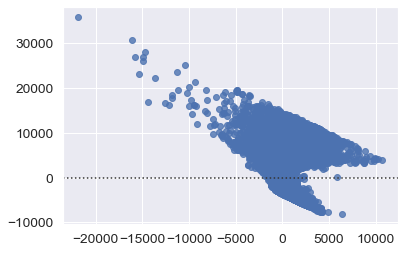

In [44]:

sns.residplot(x = resid, y = y_pred)

**solution:** Y transformation


In [45]:
df['price']=y.transform(lambda y:np.log(y))

In [46]:

model=sm.OLS(df['price'],Xc)
res=model.fit()

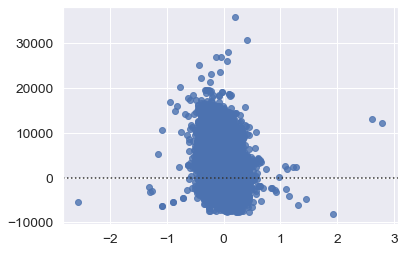

In [47]:

sns.residplot(x =res.resid, y = y_pred)

* after y_tranformation **homoscadasticity** is achived.

**2.Checking for LinearRelationship(between indipendent and dependent)**

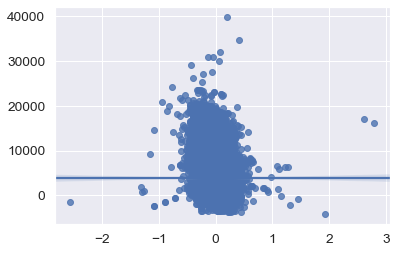

In [48]:
sns.regplot(x = res.resid, y = y_pred)

In [49]:
import statsmodels.api as sm
sm.stats.diagnostic.linear_rainbow(res=res,frac=0.5)

(0.825270792599326, 0.9999999999999999)

* here no relationship is evident by looking the plot

**2.Checking for autocorelation**

In [50]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.981
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                 1.233e+05
Date:                Sat, 04 Jan 2020   Prob (F-statistic):               0.00
Time:                        10:26:40   Log-Likelihood:                 30068.
No. Observations:               53933   AIC:                        -6.009e+04
Df Residuals:                   53909   BIC:                        -5.988e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -2.4638      0.033    -73.801      0.000      -2.529      -2.398
carat                     -1.0004      0.006   -157.791      0.000      -1.013      -0.988
total_depth_percentage     0.0588      0.001    105.539      0.000       0.058       0.060
table                      0.0090      0.000     25.268      0.000       0.008       0.010
length_mm                  1.3398      0.004    322.455      0.000       1.332       1.348
width_mm                   0.0204      0.002      8.570      0.000       0.016       0.025
depth_mm                   0.0508      0.004     12.371      0.000       0.043       0.059
cut_Fair                  -0.5978      0.008    -73.186      0.000      -0.614      -0.582
cut_Good                  -0.4984      0.007    -70.156      0.000      -0.512      -0.485
cut_Ideal                 -0.4309      0.006    -70.626      0.000      -0.443      -0.419
cut_Premium               -0.4766      0.007    -72.369      0.000      -0.490      -0.464
cut_Very Good             -0.4601      0.007    -69.752      0.000      -0.473      -0.447
color_D                   -0.1430      0.005    -28.564      0.000      -0.153      -0.133
color_E                   -0.1999      0.005    -40.467      0.000      -0.210      -0.190
color_F                   -0.2383      0.005    -48.033      0.000      -0.248      -0.229
color_G                   -0.3044      0.005    -61.396      0.000      -0.314      -0.295
color_H                   -0.4011      0.005    -80.190      0.000      -0.411      -0.391
color_I                   -0.5205      0.005   -102.264      0.000      -0.530      -0.510
color_J                   -0.6567      0.005   -123.204      0.000      -0.667      -0.646
clarity_I1                -1.0078      0.006   -158.263      0.000      -1.020      -0.995
clarity_IF                 0.0938      0.005     18.717      0.000       0.084       0.104
clarity_SI1               -0.4183      0.005    -92.898      0.000      -0.427      -0.409
clarity_SI2               -0.5859      0.005   -128.913      0.000      -0.595      -0.577
clarity_VS1               -0.2021      0.004    -45.276      0.000      -0.211      -0.193
clarity_VS2               -0.2711      0.004    -61.094      0.000      -0.280      -0.262
clarity_VVS1              -0.0005      0.005     -0.104      0.917      -0.010       0.009
clarity_VVS2              -0.0719      0.005    -15.827      0.000      -0.081      -0.063
==============================================================================
Omnibus:                     9958.267   Durbin-Watson:                   1.456
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           251111.454
Skew:                           0.185   Prob(JB):                         0.00
Kurtosis:                      13.564

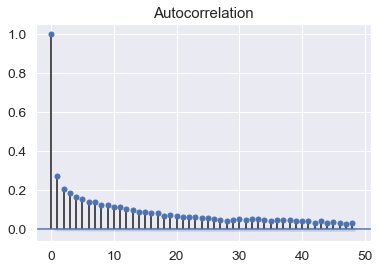

In [51]:
import statsmodels.tsa.api as smt

acf=smt.graphics.plot_acf(res.resid)
acf.show()

* Durbin-Watson statictic is **1.456**
* here Durbin-Watson statictic is between **0 and 2** that means negative autocorelation is present

**3.Checking for NormalDistribution of error terms**

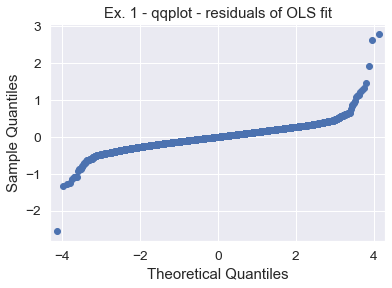

In [52]:
import scipy.stats as stats
import pylab
a = res.resid # residuals
probplot = sm.ProbPlot(a)
fig = probplot.qqplot()
h = plt.title('Ex. 1 - qqplot - residuals of OLS fit')
plt.show()

**solution:** X transformation

In [53]:
a=df.drop('price',axis=1)
b=a.columns

In [54]:
 for col in b:
    df[col]=df[col].transform(lambda x:np.log(x+1))

In [55]:
x=df.drop('price',axis=1)
y=df['price']
model=sm.OLS(y,x)
result=model.fit()

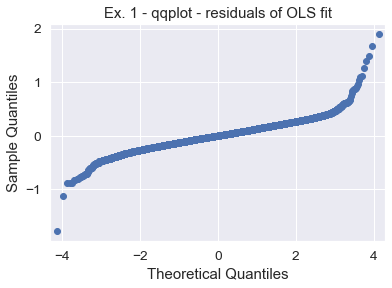

In [56]:
import scipy.stats as stats
import pylab
a = result.resid # residuals
probplot = sm.ProbPlot(a)
fig = probplot.qqplot()
h = plt.title('Ex. 1 - qqplot - residuals of OLS fit')
plt.show()

(30818.9095625393, 0.0)


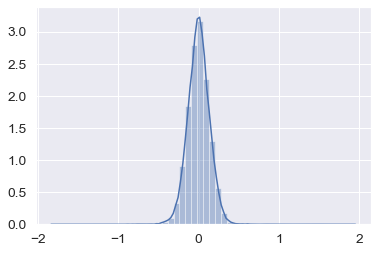

In [57]:
from scipy import stats

print(stats.jarque_bera(result.resid))
sns.distplot(result.resid)

* there is normal distribution between error terms.

**checking for multicolinearity**

In [58]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif["features"] = x.columns
vif

,VIF Factor,features
0,48.672430,carat
1,1.906812,total_depth_percentage
2,1.796067,table
3,201.082374,length_mm
4,157.177463,width_mm
5,29.733555,depth_mm
6,inf,cut_Fair
7,inf,cut_Good
8,inf,cut_Ideal
9,inf,cut_Premium


* here high vif values are removed from dataset to avoid muticolinearity

# FeatureSelection

In [59]:
#here  we are removing this columns due to high vif values
#we are not performing any feature selection techiques.
['cut_Fair','cut_Good','cut_Ideal','cut_Premium','cut_Very Good','color_D','color_E','color_F',
 'color_G','color_H','color_I','color_J','clarity_I1','clarity_IF','clarity_SI1','clarity_SI2','clarity_VS1','clarity_VS2',
 'clarity_VVS1','clarity_VVS2','depth_mm','price']

['cut_Fair',
 'cut_Good',
 'cut_Ideal',
 'cut_Premium',
 'cut_Very Good',
 'color_D',
 'color_E',
 'color_F',
 'color_G',
 'color_H',
 'color_I',
 'color_J',
 'clarity_I1',
 'clarity_IF',
 'clarity_SI1',
 'clarity_SI2',
 'clarity_VS1',
 'clarity_VS2',
 'clarity_VVS1',
 'clarity_VVS2',
 'depth_mm',
 'price']

# TrainTestSplit

In [60]:
X=df.drop(['cut_Fair','cut_Good','cut_Ideal','cut_Premium','cut_Very Good','color_D','color_E','color_F',
           'color_G','color_H','color_I','color_J','clarity_I1','clarity_IF','clarity_SI1','clarity_SI2','clarity_VS1','clarity_VS2','clarity_VVS1',
           'clarity_VVS2','depth_mm','price'],axis=1)

In [61]:
y=df['price']

In [62]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=.30,random_state=0)
print(x_train.shape)
print(x_test.shape)

(37753, 5)
(16180, 5)


# LinearRegression

In [63]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

**training and testing accuracy**

In [67]:
from sklearn.metrics import r2_score
y_train_pred=lr_model.predict(x_train)
y_test_pred=lr_model.predict(x_test)

In [71]:
print("train score:",lr_model.score(x_train,y_train))
print("test score:",lr_model.score(x_test,y_test))

train score: 0.934277117755025
test score: 0.9354735577688806


In [73]:
y_pred=lr_model.predict(x_test)

In [74]:
y_pred

array([6.63184814, 7.95354686, 7.86626627, ..., 6.5047908 , 8.95820565,
       6.51797133])

**mean square error**

In [75]:
# The mean squared error
print("Mean squared error: %.2f" % np.mean((lr_model.predict(x_test) - y_test) ** 2))


Mean squared error: 0.07


**explained variance score**

In [76]:
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % lr_model.score(x_test, y_test))

Variance score: 0.94


**correlation between y_actual and y_pred**

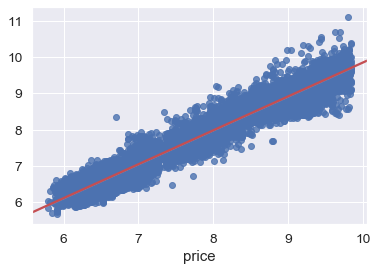

In [77]:
sns.regplot(y_test,y_pred,line_kws = {'color':'r'})

**business interpretation/explanation of the model**

In [78]:
lr_model.coef_

array([-0.29273771,  0.86851671, -0.71707291,  5.45785972,  0.96674317])

In [79]:
print(list(zip(X.columns,lr_model.coef_)))

[('carat', -0.2927377149885431), ('total_depth_percentage', 0.868516709548825), ('table', -0.7170729070111193), ('length_mm', 5.457859720494575), ('width_mm', 0.9667431713713358)]


* for increase in diamond **length(mm)** in **one** unit its **price** increases to **5units** 
* for increase in diamond **width(mm)** in **one** unit its **price** increases to **9.6units**

# polynomial Regression

In [123]:
# Fitting Polynomial Regression to the dataset 
from sklearn.preprocessing import PolynomialFeatures
polynomial_features= PolynomialFeatures(degree=2)
x_poly = polynomial_features.fit_transform(X)
X_train,X_test,y_train,y_test=train_test_split(x_poly,y,test_size=0.30,random_state=0)

model = LinearRegression()
model.fit(X_train,y_train)
y_poly_pred = model.predict(X_test)

**model accuracy**

In [128]:
train_score=model.score(X_train,y_train)
test_score=model.score(X_test,y_test)
print('train_score:',train_score)
print('test_score:',test_score)

train_score: 0.9415592187572258
test_score: 0.9370954556735073


# RandomForest Regression

In [85]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

In [86]:
model=RandomForestRegressor()

params= {'max_depth':range(1,10),'n_estimators':[100,200,300,400] }

In [87]:
RF=RandomizedSearchCV(model,param_distributions=params,cv=3)
RF.fit(x_train,y_train)

RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators='warn',
                                                   n_jobs=None, oob_score=False,
                                                   random_state=N

In [88]:
RF.best_params_

{'n_estimators': 100, 'max_depth': 9}

In [89]:
randomforest = RandomForestRegressor(**RF.best_params_)
randomforest.fit(x_train,y_train)
training_score=randomforest.score(x_train,y_train)
testing_score=randomforest.score(x_test,y_test)
print(training_score)
print(testing_score)


0.9506377303026093
0.9474338568168764


In [90]:
#r2 score
randomforest.score(x_test,y_test)

0.9474338568168764

In [91]:
y_predict=randomforest.predict(x_test)

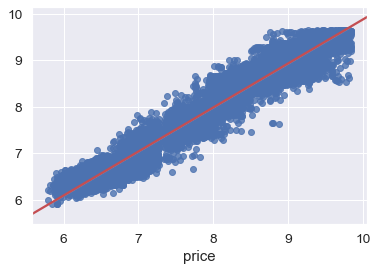

In [92]:
sns.regplot(y_test,y_predict,line_kws = {'color':'r'})

# Cross Validation

In [93]:
import sklearn.model_selection as model_selection
from sklearn.model_selection import KFold, cross_val_score

In [94]:
kfold = model_selection.KFold(shuffle = True,n_splits= 15,random_state=0)
cv_results = model_selection.cross_val_score(lr_model,X,y,cv = kfold)

In [95]:
print(cv_results)

[0.935639   0.93616109 0.93756673 0.93378819 0.93286008 0.93475187
 0.93446352 0.93692808 0.93237235 0.93321322 0.93112955 0.93469967
 0.93150337 0.93355671 0.93709404]


In [96]:
# model accuracy
print(cv_results.mean())

0.934381831522023


# Regularization

**Ridge regression**

In [97]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor

In [98]:

lambdas=np.linspace(0.1,5,100)
model=Ridge()
params={'alpha':lambdas}

In [99]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
rr=GridSearchCV(model,param_grid=params,cv=3)

In [100]:
rr.fit(x_train,y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': array([0.1       , 0.14949495, 0.1989899 , 0.24848485, 0.2979798 ,
       0.34747475, 0.3969697 , 0.44646465, 0.4959596 , 0.54545455,
       0.59494949, 0.64444444...
       3.56464646, 3.61414141, 3.66363636, 3.71313131, 3.76262626,
       3.81212121, 3.86161616, 3.91111111, 3.96060606, 4.01010101,
       4.05959596, 4.10909091, 4.15858586, 4.20808081, 4.25757576,
       4.30707071, 4.35656566, 4.40606061, 4.45555556, 4.50505051,
       4.55454545, 4.6040404 , 4.65353535, 4.7030303 , 4.75252525,
       4.8020202 , 4.85151515, 4.9010101 , 4.95050505, 5.        ])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scorin

In [101]:
rr.best_params_

{'alpha': 0.1}

In [102]:
model=Ridge(**rr.best_params_)
model.fit(x_train,y_train)
train_score=model.score(x_train,y_train)
test_score=model.score(x_test,y_test)
print(train_score)
print(test_score)

0.9342762245019577
0.9354914644701995


In [103]:
#r2_score
model.score(x_test,y_test)

0.9354914644701995

In [104]:
y_predict=rr.predict(x_test)

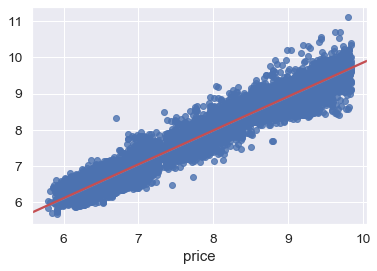

In [105]:
sns.regplot(y_test,y_predict,line_kws = {'color':'r'})

**Lasso Regression**

In [106]:
lambdas=np.linspace(0.1,5,100)
model=Lasso()
params={'alpha':lambdas}

In [107]:
ls=GridSearchCV(model,param_grid=params,cv=3)

In [108]:
ls.fit(x_train,y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': array([0.1       , 0.14949495, 0.1989899 , 0.24848485, 0.2979798 ,
       0.34747475, 0.396969...
       3.56464646, 3.61414141, 3.66363636, 3.71313131, 3.76262626,
       3.81212121, 3.86161616, 3.91111111, 3.96060606, 4.01010101,
       4.05959596, 4.10909091, 4.15858586, 4.20808081, 4.25757576,
       4.30707071, 4.35656566, 4.40606061, 4.45555556, 4.50505051,
       4.55454545, 4.6040404 , 4.65353535, 4.7030303 , 4.75252525,
       4.8020202 , 4.85151515, 4.9010101 , 4.95050505, 5.        ])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
 

In [109]:
ls.best_params_

{'alpha': 0.1}

In [110]:
model=Lasso(**ls.best_params_)
model.fit(x_train,y_train)
train_score=model.score(x_train,y_train)
test_score=model.score(x_test,y_test)
print(train_score)
print(test_score)

0.7472661742475468
0.7466265433271084


In [111]:
#r2_score
model.score(x_test,y_test)

0.7466265433271084

In [112]:
y_predict=model.predict(x_test)

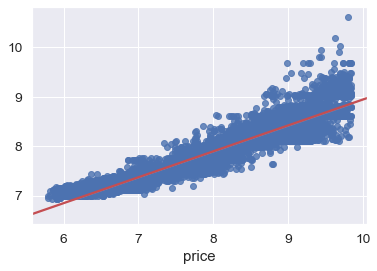

In [113]:
sns.regplot(y_test,y_predict,line_kws = {'color':'r'})

**ElasticNet regression**

In [114]:
lambdas=np.linspace(0.1,5,100)
model=ElasticNet()
params={'alpha':lambdas}

In [115]:
Er=GridSearchCV(model,param_grid=params,cv=3)

In [116]:
Er.fit(x_train,y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True,
                                  l1_ratio=0.5, max_iter=1000, normalize=False,
                                  positive=False, precompute=False,
                                  random_state=None, selection='cyclic',
                                  tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': array([0.1       , 0.14949495, 0.1989899 , 0.24848485, 0.2979798 ,
       0...
       3.56464646, 3.61414141, 3.66363636, 3.71313131, 3.76262626,
       3.81212121, 3.86161616, 3.91111111, 3.96060606, 4.01010101,
       4.05959596, 4.10909091, 4.15858586, 4.20808081, 4.25757576,
       4.30707071, 4.35656566, 4.40606061, 4.45555556, 4.50505051,
       4.55454545, 4.6040404 , 4.65353535, 4.7030303 , 4.75252525,
       4.8020202 , 4.85151515, 4.9010101 , 4.95050505, 5.        ])},
             pre_dispatch='2

In [117]:
Er.best_params_

{'alpha': 0.1}

In [118]:
model=ElasticNet(**Er.best_params_)
model.fit(x_train,y_train)
train_score=rr.score(x_train,y_train)
test_score=rr.score(x_test,y_test)
print(train_score)
print(test_score)

0.9342762245019577
0.9354914644701995


In [119]:
#r2_score
model.score(x_test,y_test)

0.7057107826244675

In [120]:
y_predict=rr.predict(x_test)

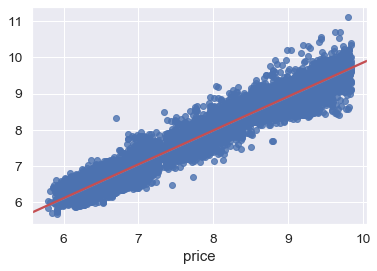

In [121]:
sns.regplot(y_test,y_predict,line_kws = {'color':'r'})

# best fit model

* **LinearRegression :** 0.94
* **Polynomial Regression :** 0.934
* **RandomForestRegressor :** 0.9474521237282223
* **CrossValidation :** 0.934381831522023
* **RidgeRegression :** 0.9354914644701995
* **LassoRegression :** 0.7466265433271084
* **ElasticNetregression :** 0.7057107826244675